In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace

import skeleton_sheet6 as skeleton

Exercise 1
----------
a)
It is a two-tailed problem and the p-value is: 0.0046
b)
It is a two-tailed problem and the p-value is: 0.1371
c)
It is a one tailed problem because negative signals do not make sense. The p-value is: 0.0009
d)
It is a one tailed problem, the p-value is: 0.0722
e)
It is a one tailored problem because we are only interested if the vaccine decreases the infection rate the p-value is: 0.0000
f)
It is a two tailed problem and if we perform the t-test given the std are unknown the p-value is: 0.1861
If we assume a std of 5 cm the p-value is: 0.1194
Exercise 2
----------
a)
The interval in micro Sievert is: 0.0935 to 0.1065
b)
The resulting upper limit in micro Sievert per hour is: 0.1083
c)
The yearly maximal radiation within the 90% is: 948.466047 µSv therefore it is below the threshhold of 1000  µSv per year.
Exercise 3
----------
the distance to neptune is: 2.4117 times the standard deviation.
the distance to uranus is: 1.2233 times the standard deviation.
Theref

In [2]:
import numpy as np


def optimal_resistance_analytical(voltage, current):
    """
    Calculate the optimal resistance R analytically for the linear regression U = RI.

    Args:
        voltage (array): The measured voltage values.
        current (array): The measured current values.

    Returns:
        float: The optimal resistance R.
    """
    # Calculate the optimal resistance using the least squares method
    R_optimal = np.dot(voltage, current) / np.dot(current, current)
    return R_optimal


# Example usage
voltage = np.array([1.0, 3.0, 5.0, 7.0, 9.0, 11.0])
current = np.array([1.3, 2.2, 2.9, 3.9, 5.05, 6.23])
R_optimal = optimal_resistance_analytical(voltage, current)
print(f"The optimal resistance R is {R_optimal:.2f} Ohm.")

The optimal resistance R is 1.73 Ohm.


In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

result = x * y
print(result)
result = np.mean(result)
print(result)

[ 2  6 12 20 30]
14.0


Optimal resistance: 19.757448979591842


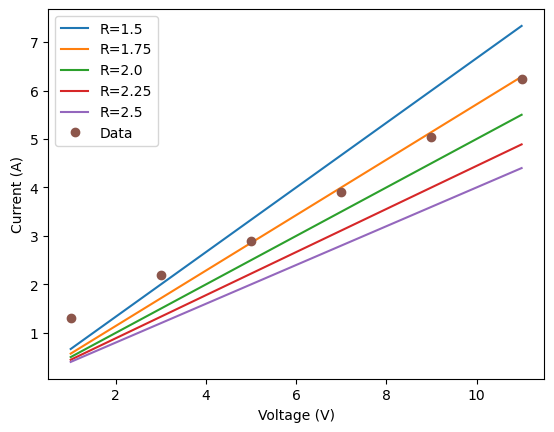

In [7]:
# test the skeleton code
#plot the data 
voltage = np.loadtxt("data/current_measurements.txt")[:, 0]
current = np.loadtxt("data/current_measurements.txt")[:, 1]

#get predicitions given the voltage
error = []
for R in np.linspace(1.5, 2.5, num=5):
    predictions = skeleton.current_ohmslaw_bias(voltage, R, 0)
    #calculate the error 
    error.append(skeleton.chi2_own_implementation(current, predictions, 0.2))
    #print(f"R={R}, chi2={error}")
    plt.plot(voltage, predictions, label=f"R={R}")

#find the optimal resistance
#get index of the minimum error
index = np.argmin(error)
R_optimal = error[index]
print(f"Optimal resistance: {R_optimal}")
#plt.legend()
plt.plot(voltage, current, "o", label="Data")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.legend()

#


Text(0, 0.5, 'Current (A)')

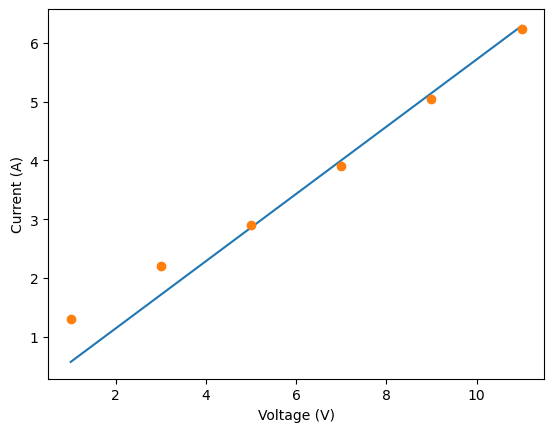

In [8]:
R = 1.75
predictions = skeleton.current_ohmslaw_bias(voltage, R, 0)
#calculate the error 
error.append(skeleton.chi2_own_implementation(current, predictions, 0.2))
#print(f"R={R}, chi2={error}")
plt.plot(voltage, predictions, label=f"R={R}")
plt.plot(voltage, current, "o", label="Data")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")


  Soil layer (cm)       a      b        c       d     e     f
0            0-20  351.57   9.59  1019.41  141.23  3.51  0.88
1           20-40  240.10  26.93   745.74  119.92  3.84  0.46
2           40-60  245.16  20.70   334.81   14.24  1.42  0.12
3           60-80  280.99  58.93   335.12    4.95  1.17  0.30
4          80-100  265.95  32.55   405.15   42.89  1.61  0.46
5         100-120  254.50  21.55   351.74   44.52  1.50  0.36


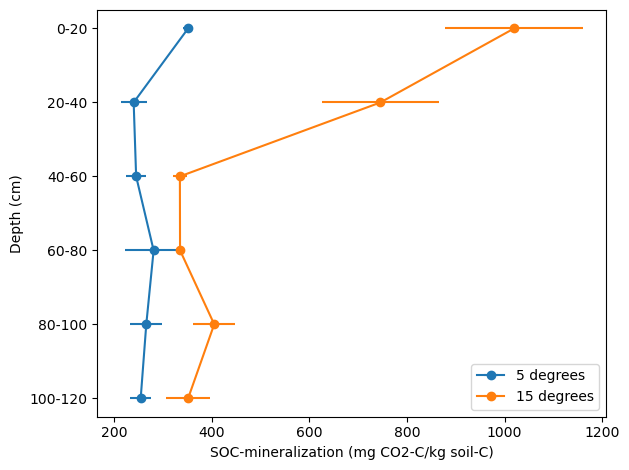

In [71]:
#create plots for leanos friend
#load a csv file
import pandas as pd
data = pd.read_csv("data/mineralization.csv", sep=";")
print(data)

#plot the data for line use short in matplotlib 


#plt.plot(data["e"] ,data["Soil layer (cm)"] , "o", label="Data")
#error bars
plt.errorbar(data["a"], data["Soil layer (cm)"], xerr=data["b"], fmt="-o", label="Data")
plt.errorbar(data["c"], data["Soil layer (cm)"], xerr=data["d"], fmt="-o", label="Data")
plt.ylabel("Depth (cm)")
plt.xlabel("SOC-mineralization (mg CO2-C/kg soil-C)")
plt.legend(["5 degrees", "15 degrees"])

#add uncertainty label to a from column b
#flip the y axis 
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("oc-mineralization.png")





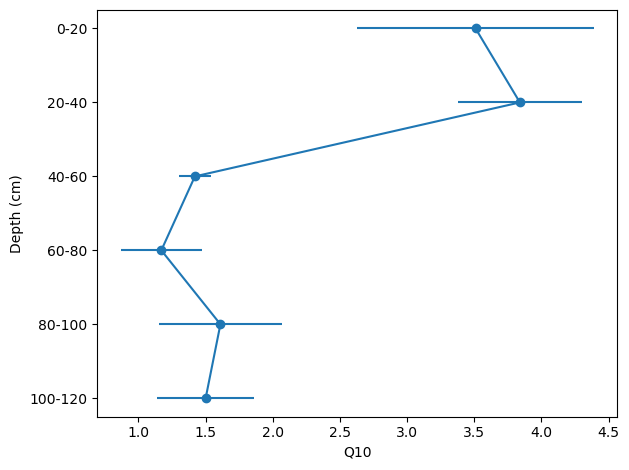

In [70]:
#plot column a and e with error f
plt.errorbar( data["e"], data["Soil layer (cm)"], xerr=data["f"], fmt="-o", label="Data")
plt.ylabel("Depth (cm)")
plt.xlabel("Q10")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("q10-mineralization.png")
plt.show()


In [73]:
from scipy.stats import chi2

chi2.pdf(1.5, 1)

0.15386632280545526